In [14]:
from os import listdir
from pandas import read_csv
import pandas as pd
import numpy as np
import glob
import random
from pandas import DataFrame
from matplotlib import pyplot
from numpy import vstack
from numpy import unique

In [15]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a group of files, such as x, y, z data for a given variable and  return them as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset type, such as train or test
def load_dataset(type, prefix=''):
    path = prefix + type + '/Inertial Signals/'
    
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_' + type + '.txt', 'total_acc_y_' + type + '.txt', 'total_acc_z_' + type + '.txt']
    # body acceleration
    filenames += ['body_acc_x_' + type + '.txt', 'body_acc_y_' + type + '.txt', 'body_acc_z_' + type + '.txt']
    # body gyroscope
    filenames += ['body_gyro_x_' + type + '.txt', 'body_gyro_y_' + type + '.txt', 'body_gyro_z_' + type + '.txt']

    # load input data
    X = load_group(filenames, path)
    # load output data
    y = load_file(prefix + type + '/y_'+type+'.txt')
    return X, y

In [16]:
# summarize the balance of classes in an output variable column
def class_breakdown(data):
    # convert the numpy array into a dataframe
    df = DataFrame(data)
    # group data by the class value and calculate the number of rows
    counts = df.groupby(0).size()
    # retrieve raw rows
    counts = counts.values
    # summarize
    for i in range(len(counts)):
        percent = counts[i] / len(df) * 100
        print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

In [17]:
# load all train data
trainX, trainy = load_dataset('train', 'UCI HAR Dataset/')
class_breakdown(trainy)
# load all test data
testX, testy = load_dataset('test', 'UCI HAR Dataset/')
class_breakdown(testy)

print('Both')
combined = vstack((trainy, testy))
class_breakdown(combined)

Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222
Both
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


In [18]:
# load data
trainX, trainy = load_dataset('train', 'UCI HAR Dataset/')

sub_map = load_file('UCI HAR Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]


In [19]:
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
    # get row indexes for the subject id
    ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
    # return the selected samples
    return X[ix, :, :], y[ix]

In [20]:
# convert a series of windows to a 1D list
def to_series(windows):
    series = list()
    for window in windows:
        # remove the overlap from the window
        half = int(len(window) / 2) - 1
        for value in window[-half:]:
            series.append(value)
    return series

In [21]:
def plot_subject(X, y, person):
    pyplot.figure()
    n, off = X.shape[2] + 1, 0
    pyplot.suptitle('Person ' + str(person), y = 0.93)

    # total acceleration
    for i in range(3):
        pyplot.subplot(n, 1, off + 1)
        pyplot.plot(to_series(X[:, :, off]))
        pyplot.title('total acc ' + str(i), y = 0, loc = 'left')
        off += 1
    
    # body acceleration
    for i in range(3):
        pyplot.subplot(n, 1, off + 1)
        pyplot.plot(to_series(X[:, :, off]))
        pyplot.title('body acc ' + str(i), y = 0, loc = 'left')
        off += 1
    
    # body gyro
    for i in range(3):
        pyplot.subplot(n, 1, off + 1)
        pyplot.plot(to_series(X[:, :, off]))
        pyplot.title('body gyro ' + str(i), y = 0, loc = 'left')
        off += 1
    
    pyplot.subplot(n, 1, n)
    pyplot.plot(y)
    pyplot.title('activity', y=0, loc='left')
    pyplot.show()

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(323, 128, 9) (323, 1)


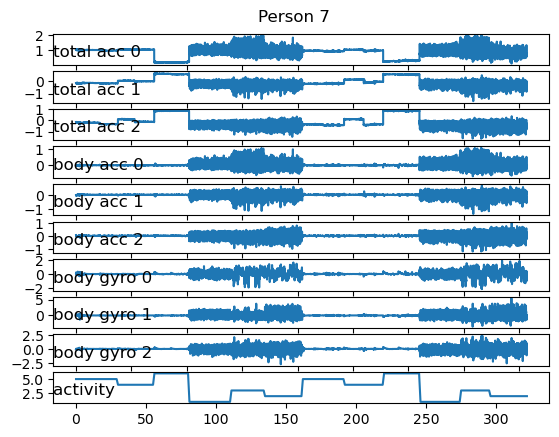

In [22]:
# load data
trainX, trainy = load_dataset('train', 'UCI HAR Dataset/')
# load mapping of rows to subjects
sub_map = load_file('UCI HAR Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)
# get the data for one subject
person = random.randint(0, len(train_subjects))
sub_id = train_subjects[person]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby, person)

Within the plots above we see different levels of activity. For the walking activities (walking, walking upstairs, and walking downstairs), which are associated with activities 1, 2, and 3, we see a greater amount of movement compared to activities 4, 5, and 6, which correspond to sitting, standing, and laying. When we see "stagnant" lines, we can correspond that to activities 4, 5, and 6. 

(382, 128, 9) (382, 1)


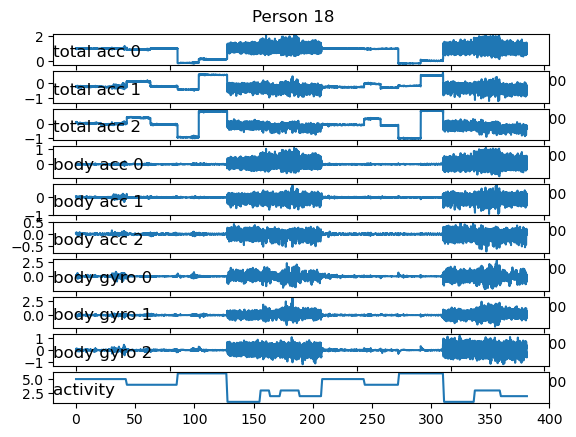

In [23]:
# get the data for one subject
person2 = random.randint(0, len(train_subjects))
if person2 == person:
    person2 = random.randint(0, len(train_subjects))
sub_id = train_subjects[person2]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby, person2)

In [24]:
# group data by activity
def data_by_activity(X, y, activities):
    # create a dictionary where the activity is the key, and the subset of X is the value
    result = {}
    for a in activities:
        mask = y[:, 0] == a
        subset_X = X[mask, :, :]
        result[a] = subset_X
    return result


def plot_activity_histograms(X, y):
    # get a list of unique activities for the subject
    activity_ids = unique(y[:,0])
    grouped = data_by_activity(X, y, activity_ids)
    
    # plot histograms per activity
    pyplot.figure()
    pyplot.suptitle('Person ' + str(person) + "'s Total Acceleration for the Different Activities", y = 0.93)
    xaxis = None
    for k in range(len(activity_ids)):
        activ_id = activity_ids[k]

        for i in range(3):
            ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
            ax.set_xlim(-1,1)
            if k == 0:
                xaxis = ax
            # create histogram subplot by indexing the grouped activities dictionary by activity and total acceleration axis
            pyplot.hist(to_series(grouped[activ_id][:,:,i]), bins=100)
            pyplot.title('activity '+str(activ_id), y=0, loc='left')
    pyplot.show()

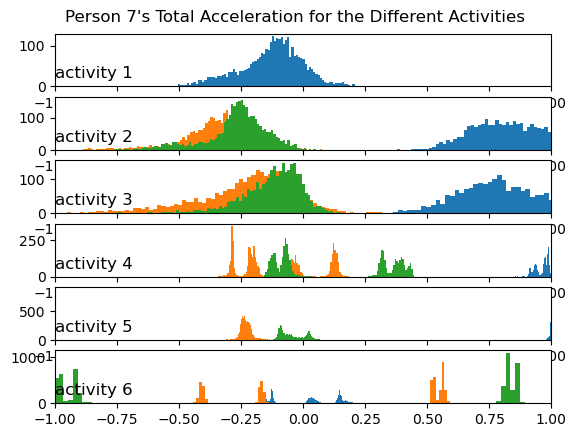

In [25]:
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
plot_activity_histograms(subX, suby)

About the dataset: 

"The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain."

"The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

These signals were used to estimate variables of the feature vector for each pattern:  
'-XYZ' is used to denote 3-axial signals in the X, Y and Z directions."

*Note for writing about bias
Read Datasheets for data sets
Model carts for model reporting

age exclusion - doesn't work well for everyone

In [26]:
#Learning through Perceptron:

#Perceptron class:
class Perceptron:
    def __init__(self, lr=0.1, num_iters=100):
        self.lr = lr
        self.num_iters = num_iters
        self.weights = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias (b) to zeros
        self.weights = np.zeros(n_features)
        self.b = 0
        
        # Train the perceptron for the specified number of iterations
        for _ in range(self.num_iters):
            for i in range(n_samples):
                # Compute the predicted class
                y_pred = self.predict(X[i])
                
                # Update weights and bias (b) if prediction is incorrect
                if y_pred != y[i]:
                    self.weights += self.lr * y[i] * X[i]
                    self.b += self.lr * y[i]
    
    def predict(self, x):
        # Compute the weighted sum of inputs
        linear_output = np.dot(x, self.weights) + self.b
        
        # Apply the step function to get the predicted class
        y_pred = np.where(linear_output >= 0, 1, -1)
        
        return y_pred

In [27]:
#data loaded in above

# filter data for activities 4 and 5
train_filter = np.where((trainy == 4) | (trainy == 5))
trainX_filtered = trainX[train_filter]
trainy_filtered = trainy[train_filter]

test_filter = np.where((testy == 4) | (testy == 5))
testX_filtered = testX[test_filter]
testy_filtered = testy[test_filter]

# normalize data
trainX_filtered = (trainX_filtered - trainX_filtered.mean()) / trainX_filtered.std()
testX_filtered = (testX_filtered - testX_filtered.mean()) / testX_filtered.std()

# create and train perceptron
perceptron = Perceptron(lr=0.1, num_iters=100)
perceptron.fit(trainX_filtered.reshape(len(trainX_filtered), -1), np.where(trainy_filtered == 4, 1, -1))

# evaluate on test data
y_pred = perceptron.predict(testX_filtered.reshape(len(testX_filtered), -1))
accuracy = np.mean(y_pred == np.where(testy_filtered == 4, 1, -1))
print('Accuracy:', accuracy)

Accuracy: 0.8093841642228738


We see above that training the perceptron algorithm over activities 4 and 5 (sitting and standing respectively), produces a 81% accuracy rate.
What if we test it over activities 2 and 3 (walking upstairs and walking downstairs)? In that case we see an accuracy rate of 55%. That's not very good!

In [28]:
# load data
trainX, trainy = load_dataset('train', 'UCI HAR Dataset/')
testX, testy = load_dataset('test', 'UCI HAR Dataset/')

# filter data for activities 2 and 3
train_filter = np.where((trainy == 2) | (trainy == 3))
trainX_filtered = trainX[train_filter]
trainy_filtered = trainy[train_filter]

test_filter = np.where((testy == 2) | (testy == 3))
testX_filtered = testX[test_filter]
testy_filtered = testy[test_filter]

# normalize data
trainX_filtered = (trainX_filtered - trainX_filtered.mean()) / trainX_filtered.std()
testX_filtered = (testX_filtered - testX_filtered.mean()) / testX_filtered.std()

# create and train perceptron
perceptron = Perceptron(lr=0.1, num_iters=100)
perceptron.fit(trainX_filtered.reshape(len(trainX_filtered), -1), np.where(trainy_filtered == 2, 1, -1))

# evaluate on test data
y_pred = perceptron.predict(testX_filtered.reshape(len(testX_filtered), -1))
accuracy = np.mean(y_pred == np.where(testy_filtered == 2, 1, -1))
print('Accuracy:', accuracy)

Accuracy: 0.547699214365881


Looking at a simple Perceptron algorithm, we can see that we can do so much better. Why don't we try on a Random Forest Classifier?

In [ ]:
# Random Forest Classifier: 
